In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
def convertToArray(obj):
  tempArray = []
  for key,value in obj.items():
    tempArray.append(value)
  temp = [item for sublist in tempArray for item in sublist]
  featureArray = [item for sublist in temp for item in sublist]
  featureArray = np.array(featureArray)
  return featureArray.reshape(1,72)

In [ ]:
def outlierRemoval(df):
  two_sd = df["Close"].std() *2
  three_sd = df["Close"].std() *3
  df_final = df[~((df["Close"]<(np.mean(df["Close"]) - three_sd)) | (df["Close"]>(np.mean(df["Close"]) + three_sd)))]
  return df_final

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import pandas as pd

count = 0
arrayDf = np.zeros(shape=(237, 72))
nameArray = []
files = os.listdir("/content/drive/MyDrive/10K/10K 2018/10K Processed")
for i,subfile in enumerate(files):
  with open("/content/drive/MyDrive/10K/10K 2018/10K Processed/{}".format(subfile), 'r') as myfile:
    data=myfile.read()
    obj = json.loads(data)
    nameArray.append(subfile.replace(".json",""))
    if len(obj.keys()) == 6:count +=1
    try:
      arrayDf[i] = convertToArray(obj)
    except ValueError:
      print(subfile)
      print(obj)
      continue

df = pd.DataFrame(arrayDf)
df["Ticker"] = nameArray
dfLabel = pd.read_csv("/content/drive/MyDrive/10K/10K 2018/DiffPriceMonth.csv")
dfLabel = dfLabel[["Ticker","Close"]]
df_train2018 = pd.merge(df,dfLabel, how ="inner", on = "Ticker" )
df_train2018["Ticker"] = df_train2018["Ticker"] + "_2018"
print( df_train2018["Close"].mean())
# df_train2018 = outlierRemoval(df_train2018)
# df_train2018["Close"] = df_train2018["Close"] - df_train2018["Close"].mean()
df_train2018

MA.json
{'\n\n\nItem\xa01.\xa0\n\n\n\nBusiness\n\n2\n\t\t\t\t\n': [[0.11120514571666718, 3.673139810562134, -7.626326560974121], [2.9798576831817627, -0.08919442445039749, -4.437704086303711], [5.331418514251709, -3.991964817047119, -3.3715546131134033], [1.8484338521957397, -1.602270483970642, -4.353562831878662]], '\n\n\nItem\xa01A.\xa0\n\n\n\nRisk Factors\n\n11\n\t\t\t\t\n': [[0.7815079689025879, -2.9673287868499756, 4.690805435180664], [2.67232608795166, -3.9722554683685303, 0.6414939761161804], [2.3310389518737793, -3.6148293018341064, -1.1688627004623413], [1.5183907747268677, -3.3255155086517334, 2.532632827758789]], '\n\n\nItem\xa03.\xa0\n\n\n\nLegal Proceedings\n\n19\n\t\t\t\t\n': [[4.307301044464111, -3.0251927375793457, -0.8140188455581665], [1.8484338521957397, -1.602270483970642, -4.353562831878662], [1.8484338521957397, -1.602270483970642, -4.353562831878662], [1.8484338521957397, -1.602270483970642, -4.353562831878662]], '\n\n\nItem\xa07.\xa0\n\n\n\nManagement’s Discussi

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,Ticker,Close
0,6.789886,-4.582199,-4.844472,1.936562,3.090760,-8.779554,7.764161,-4.558848,-4.093709,3.642822,...,-7.632714,-3.179526,5.486112,-4.606955,-3.430352,5.039207,-3.673726,-3.681355,MMM_2018,-8.229813
1,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,...,-1.602271,-4.353564,6.868699,-5.469604,-4.290102,8.076757,-6.848515,-3.501700,AOS_2018,-0.017879
2,7.493292,-3.685850,-6.604138,6.945567,-4.081628,-5.630277,4.343467,-6.263814,-0.094744,1.698196,...,-6.223911,-5.203733,7.007663,-5.606906,-5.486303,0.974579,-0.612939,0.015945,ABBV_2018,-11.227570
3,3.773371,-6.258847,-0.178782,2.704958,-7.199819,1.992658,6.923995,-6.618489,-4.581579,5.796265,...,-5.062016,-2.817373,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,ABMD_2018,-3.860016
4,-4.566700,9.756914,-6.601811,-1.458058,6.387058,-8.319581,2.743524,0.243869,-6.555376,5.360188,...,-3.598787,-5.952898,7.829594,-4.516096,-6.031168,6.942683,-6.131341,-4.894173,ADP_2018,-6.601059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-1.567183,5.829753,-7.908522,-1.639421,6.320956,-7.797088,6.202349,-2.704909,-6.412043,3.048076,...,-5.331300,-4.036398,8.007734,-7.408958,-4.376736,6.089976,-4.341487,-3.725375,LOW_2018,1.815117
231,1.951215,1.739523,-8.890810,7.223459,-3.524498,-7.136621,4.074433,-6.033281,-1.720250,7.100576,...,-6.962192,-2.939189,7.008765,-6.380201,-4.422351,3.107587,-3.191981,-3.390308,MPC_2018,0.571133
232,2.396635,-0.429889,-6.748555,-6.333300,11.569483,-7.393098,3.578139,1.420758,-9.504498,3.841902,...,-3.620879,-4.970409,8.252495,-4.339332,-6.363556,6.363032,-5.726797,-3.799448,MKTX_2018,-8.821121
233,5.161747,-3.006174,-4.961155,8.481566,-5.537442,-5.738067,-3.980218,8.263753,-8.149148,-2.392973,...,-6.221213,-5.571529,6.194196,-5.551954,-5.312780,5.315644,-5.378306,-2.800219,MAR_2018,-5.748192


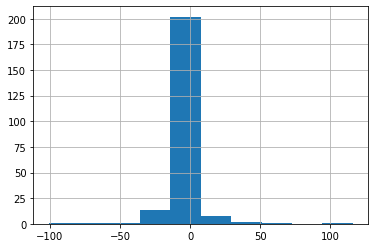

In [ ]:
df_train2018["Close"].hist()

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import pandas as pd

count = 0
arrayDf = np.zeros(shape=(263, 72))
nameArray = []
files = os.listdir("/content/drive/MyDrive/10K/10K 2017/10K Processed")
for i,subfile in enumerate(files):
  with open("/content/drive/MyDrive/10K/10K 2017/10K Processed/{}".format(subfile), 'r') as myfile:
    data=myfile.read()
    obj = json.loads(data)
    nameArray.append(subfile.replace(".json",""))
    if len(obj.keys()) == 6:count +=1
    try:
      arrayDf[i] = convertToArray(obj)
    except ValueError:
      print(subfile)
      print(obj)
      continue

df = pd.DataFrame(arrayDf)
df["Ticker"] = nameArray
dfLabel = pd.read_csv("/content/drive/MyDrive/10K/10K 2017/DiffPriceMonth.csv")
dfLabel = dfLabel[["Ticker","Close"]]
df_train2017= pd.merge(df,dfLabel, how ="inner", on = "Ticker" )
df_train2017["Ticker"] = df_train2017["Ticker"] + "_2017"
print(df_train2017["Close"].mean())
# df_train2017 = outlierRemoval(df_train2017)
# df_train2017["Close"] = df_train2017["Close"] - df_train2017["Close"].mean()
df_train2017

6.393107601838518


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,Ticker,Close
0,6.789886,-4.582200,-4.844474,1.936563,3.090758,-8.779552,7.896590,-4.696102,-4.088266,-0.584349,...,-4.774589,-3.800470,5.039205,-3.673725,-3.681352,-0.416243,2.228051,-3.979611,MMM_2017,8.777496
1,7.548165,-4.569502,-5.547996,5.861463,-4.363427,-3.935853,4.437150,-3.747367,-2.041251,5.088927,...,-3.581930,-4.764238,7.712446,-5.408373,-5.316835,4.181272,-3.917273,-2.819231,AOS_2017,3.468800
2,6.424978,-2.252576,-7.332398,6.660168,-3.700129,-4.925566,4.557710,-3.307616,-4.321107,2.944178,...,-5.616098,-5.949099,8.410640,-6.414872,-6.112659,5.900154,-4.237338,-5.906274,ABBV_2017,16.166252
3,0.801720,3.949839,-7.650300,4.056275,-0.957411,-6.653972,0.948053,-0.563480,-4.695673,1.501593,...,-5.355325,-3.056755,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,ABMD_2017,40.459991
4,6.026543,-2.218344,-6.151136,-0.767266,4.400586,-8.794952,-4.295236,8.595222,-6.613547,4.161835,...,-6.819029,-3.109068,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,ACN_2017,12.215683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,7.291306,-5.984042,-5.092558,6.773749,-6.886712,-3.855730,-4.943546,8.999969,-5.933836,1.859035,...,-5.338582,-5.244202,7.495572,-6.669300,-4.959280,6.375198,-6.261242,-3.246843,FE_2017,-1.175978
258,2.563137,1.199089,-8.361084,5.000549,-1.840989,-6.162487,-3.978234,8.660569,-7.189059,2.864021,...,-5.042450,-3.145047,6.695014,-5.266757,-5.595001,6.482863,-3.482475,-5.572411,FISV_2017,6.064995
259,6.308270,-3.101819,-5.249177,1.075776,4.011266,-9.230569,6.507740,-2.925832,-6.716533,3.063957,...,-5.882735,-3.695093,7.646936,-4.558412,-5.816044,3.677557,-3.487375,-4.672122,FLT_2017,28.750000
260,-1.891596,3.570201,-6.233445,-1.018387,5.223858,-9.597749,5.955761,-2.474912,-5.013685,4.526442,...,-5.786047,-4.627668,3.507988,-5.767100,-2.004321,2.726573,-4.086215,-3.351153,FMC_2017,-1.779533


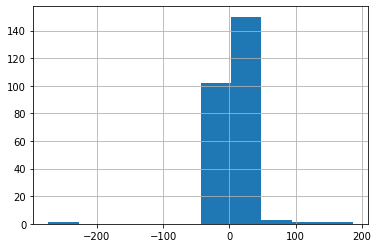

In [ ]:
df_train2017["Close"].hist()

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import pandas as pd

count = 0
arrayDf = np.zeros(shape=(224, 72))
nameArray = []
files = os.listdir("/content/drive/MyDrive/10K/10K 2016/10K Processed")
for i,subfile in enumerate(files):
  with open("/content/drive/MyDrive/10K/10K 2016/10K Processed/{}".format(subfile), 'r') as myfile:
    data=myfile.read()
    obj = json.loads(data)
    nameArray.append(subfile.replace(".json",""))
    if len(obj.keys()) == 6:count +=1
    try:
      arrayDf[i] = convertToArray(obj)
    except ValueError:
      print(subfile)
      print(obj)
      continue

df = pd.DataFrame(arrayDf)
# print(df)
df["Ticker"] = nameArray
dfLabel = pd.read_csv("/content/drive/MyDrive/10K/10K 2016/DiffPriceMonth.csv")
dfLabel = dfLabel[["Ticker","Close"]]
df_train2016= pd.merge(df,dfLabel, how ="inner", on = "Ticker" )
df_train2016["Ticker"] = df_train2016["Ticker"] + "_2016"
print(df_train2016["Close"].mean())
# df_train2016 = outlierRemoval(df_train2016)
# df_train2016["Close"] = df_train2016["Close"] - df_train2016["Close"].mean()
df_train2016

TFC.json
{'Item 1Business4': [[5.909832000732422, -2.9321181774139404, -5.96811056137085], [5.2374067306518555, -5.509994983673096, -3.2362422943115234], [3.466703176498413, -3.7815163135528564, -3.503981113433838], [6.489894390106201, -5.338796138763428, -3.410069227218628]], 'Item 1ARisk Factors17': [[2.394320011138916, -6.593214511871338, 3.945162296295166], [1.2762802839279175, -6.27983283996582, 5.98832893371582], [-0.9578144550323486, -4.671865940093994, 6.967602252960205], [-1.27107572555542, -5.104126453399658, 8.34861946105957]], 'Item 3Legal Proceedings (see Note 7, Note 12\xa0and Note 14)110, 116, 120': [[1.848434567451477, -1.6022703647613525, -4.3535637855529785], [1.848434567451477, -1.6022703647613525, -4.3535637855529785], [1.848434567451477, -1.6022703647613525, -4.3535637855529785], [1.848434567451477, -1.6022703647613525, -4.3535637855529785]], 'Item 7AQuantitative and Qualitative Disclosures About Market Risk (see Market Risk Management)65': [[6.600385665893555, -5.

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,Ticker,Close
0,1.054422,3.656880,-7.937083,6.890633,-3.187815,-6.007726,4.929782,-2.228148,-6.461235,4.170414,...,-3.457684,-3.844380,3.550439,-3.202247,-2.421479,1.848435,-1.602270,-4.353564,SCHW_2016,2.064903
1,5.954010,-2.982057,-6.199577,8.641821,-5.664006,-4.590096,4.399080,-2.551245,-6.244376,-1.461887,...,-4.438562,-2.794296,8.083727,-4.961101,-6.326505,4.095191,-6.423841,0.258865,D_2016,1.967377
2,-0.559116,5.660388,-9.027636,6.931211,-4.584451,-5.376200,-2.621980,7.957510,-8.367516,2.612940,...,-4.805300,-5.610483,6.994122,-5.568496,-4.789723,7.414720,-4.455574,-5.756675,DPZ_2016,5.315765
3,-5.425389,10.230280,-7.727496,4.961910,-2.732143,-6.651234,4.360503,-4.871271,-1.653608,-0.480734,...,-5.962030,-4.324972,5.425882,-4.152190,-6.136920,6.658423,-5.441827,-5.828878,DOV_2016,2.100159
4,6.717545,-4.102879,-5.880243,6.178503,-4.489427,-4.511282,3.180825,-1.597424,-4.535712,2.645090,...,-5.079185,-4.285617,6.371291,-5.919427,-4.195292,6.994844,-5.867777,-4.857419,DTE_2016,3.041199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-2.817831,7.705623,-8.524385,-0.350872,5.339968,-8.601386,0.598372,3.185189,-8.029346,5.825726,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,DGX_2016,3.133644
218,-1.454524,4.122458,-5.921499,-2.530169,6.641117,-6.967078,2.878608,-0.921051,-5.508587,6.504893,...,-5.380218,-6.483158,6.703317,-6.211482,-4.428328,7.422694,-5.860216,-5.352882,SNPS_2016,5.779999
219,5.074727,-1.267426,-7.902007,8.277008,-5.347475,-5.950065,3.146744,-3.210304,-2.581960,5.021250,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,RTX_2016,0.921581
220,-4.013227,9.725266,-8.283216,2.669951,-2.154113,0.103809,2.534647,-1.142129,-4.254420,6.749443,...,-5.179796,-5.013239,7.922619,-4.795978,-6.150117,4.522890,-5.618685,-2.729011,INTC_2016,3.098667


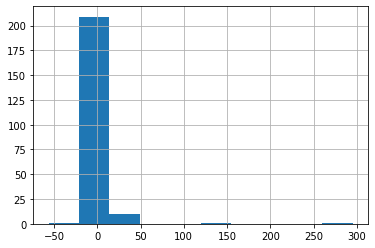

In [ ]:
df_train2016["Close"].hist()

In [ ]:
df_train = df_train2018.append(df_train2017).append(df_train2016)
df_train

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,Ticker,Close
0,6.789886,-4.582199,-4.844472,1.936562,3.090760,-8.779554,7.764161,-4.558848,-4.093709,3.642822,...,-7.632714,-3.179526,5.486112,-4.606955,-3.430352,5.039207,-3.673726,-3.681355,MMM_2018,-8.229813
1,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,...,-1.602271,-4.353564,6.868699,-5.469604,-4.290102,8.076757,-6.848515,-3.501700,AOS_2018,-0.017879
2,7.493292,-3.685850,-6.604138,6.945567,-4.081628,-5.630277,4.343467,-6.263814,-0.094744,1.698196,...,-6.223911,-5.203733,7.007663,-5.606906,-5.486303,0.974579,-0.612939,0.015945,ABBV_2018,-11.227570
3,3.773371,-6.258847,-0.178782,2.704958,-7.199819,1.992658,6.923995,-6.618489,-4.581579,5.796265,...,-5.062016,-2.817373,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,ABMD_2018,-3.860016
4,-4.566700,9.756914,-6.601811,-1.458058,6.387058,-8.319581,2.743524,0.243869,-6.555376,5.360188,...,-3.598787,-5.952898,7.829594,-4.516096,-6.031168,6.942683,-6.131341,-4.894173,ADP_2018,-6.601059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-2.817831,7.705623,-8.524385,-0.350872,5.339968,-8.601386,0.598372,3.185189,-8.029346,5.825726,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,DGX_2016,3.133644
218,-1.454524,4.122458,-5.921499,-2.530169,6.641117,-6.967078,2.878608,-0.921051,-5.508587,6.504893,...,-5.380218,-6.483158,6.703317,-6.211482,-4.428328,7.422694,-5.860216,-5.352882,SNPS_2016,5.779999
219,5.074727,-1.267426,-7.902007,8.277008,-5.347475,-5.950065,3.146744,-3.210304,-2.581960,5.021250,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,RTX_2016,0.921581
220,-4.013227,9.725266,-8.283216,2.669951,-2.154113,0.103809,2.534647,-1.142129,-4.254420,6.749443,...,-5.179796,-5.013239,7.922619,-4.795978,-6.150117,4.522890,-5.618685,-2.729011,INTC_2016,3.098667


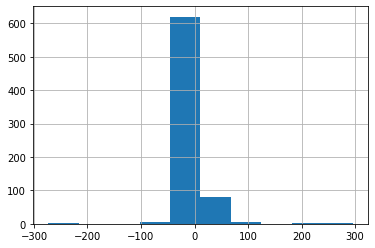

In [ ]:
df_train["Close"].hist()

In [ ]:
df_train = df_train.dropna()
df_train.shape

(710, 74)

In [ ]:
# df_train = df_train[abs(df_train["Close"]) < 300] 
# df_train.shape

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,Ticker,Close
0,6.789886,-4.582199,-4.844472,1.936562,3.090760,-8.779554,7.764161,-4.558848,-4.093709,3.642822,...,-7.632714,-3.179526,5.486112,-4.606955,-3.430352,5.039207,-3.673726,-3.681355,MMM_2018,-8.229813
1,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,1.848435,...,-1.602271,-4.353564,6.868699,-5.469604,-4.290102,8.076757,-6.848515,-3.501700,AOS_2018,-0.017879
2,7.493292,-3.685850,-6.604138,6.945567,-4.081628,-5.630277,4.343467,-6.263814,-0.094744,1.698196,...,-6.223911,-5.203733,7.007663,-5.606906,-5.486303,0.974579,-0.612939,0.015945,ABBV_2018,-11.227570
3,3.773371,-6.258847,-0.178782,2.704958,-7.199819,1.992658,6.923995,-6.618489,-4.581579,5.796265,...,-5.062016,-2.817373,1.848435,-1.602271,-4.353564,1.848435,-1.602271,-4.353564,ABMD_2018,-3.860016
4,-4.566700,9.756914,-6.601811,-1.458058,6.387058,-8.319581,2.743524,0.243869,-6.555376,5.360188,...,-3.598787,-5.952898,7.829594,-4.516096,-6.031168,6.942683,-6.131341,-4.894173,ADP_2018,-6.601059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-2.817831,7.705623,-8.524385,-0.350872,5.339968,-8.601386,0.598372,3.185189,-8.029346,5.825726,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,DGX_2016,3.133644
218,-1.454524,4.122458,-5.921499,-2.530169,6.641117,-6.967078,2.878608,-0.921051,-5.508587,6.504893,...,-5.380218,-6.483158,6.703317,-6.211482,-4.428328,7.422694,-5.860216,-5.352882,SNPS_2016,5.779999
219,5.074727,-1.267426,-7.902007,8.277008,-5.347475,-5.950065,3.146744,-3.210304,-2.581960,5.021250,...,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,1.848434,-1.602270,-4.353563,RTX_2016,0.921581
220,-4.013227,9.725266,-8.283216,2.669951,-2.154113,0.103809,2.534647,-1.142129,-4.254420,6.749443,...,-5.179796,-5.013239,7.922619,-4.795978,-6.150117,4.522890,-5.618685,-2.729011,INTC_2016,3.098667


In [ ]:
df_train.drop(["Ticker","Close"],axis = 1).shape[1]

72

In [ ]:
df_train_temp = df_train

In [ ]:
def GetSentiment(row):
  returnRow = []
  labels = {0:0, 1:1,2:-1}
  for i in range(0,len(row)-2,3):
    array = row[i:i+3].to_list()
    val = labels[array.index(max(array))]
    returnRow.append(val)
  return pd.Series(returnRow)
df_train_temp = df_train
df_train_temp = df_train.apply(GetSentiment,axis = 1)
df_train_temp[["Ticker","Close"]] = df_train[["Ticker","Close"]]
df_train_temp

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,Ticker,Close
0,0,1,0,0,0,-1,-1,-1,0,0,...,-1,-1,0,0,0,0,0,0,MMM_2018,-8.229813
1,0,0,0,0,-1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,AOS_2018,-0.017879
2,0,0,0,0,-1,-1,0,-1,0,0,...,0,0,-1,0,0,0,0,0,ABBV_2018,-11.227570
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ABMD_2018,-3.860016
4,1,1,0,0,-1,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,ADP_2018,-6.601059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1,1,1,0,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,DGX_2016,3.133644
218,1,1,0,0,-1,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,SNPS_2016,5.779999
219,0,0,0,0,-1,-1,-1,-1,0,-1,...,0,0,0,0,0,0,0,0,RTX_2016,0.921581
220,1,0,0,0,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,INTC_2016,3.098667


In [ ]:
one = {0:0,1:0,-1:0}
oneA = {0:0,1:0,-1:0}
three = {0:0,1:0,-1:0}
seven = {0:0,1:0,-1:0}
sevenA = {0:0,1:0,-1:0}
eight = {0:0,1:0,-1:0}
for index, row in df_train_temp.drop(["Ticker","Close"],axis = 1 ).iterrows():
  for i,el in enumerate(row):
    if i in range(4):
      one[el] +=1
    if i in range(4,8):
      oneA[el] +=1
    if i in range(8,12):
      three[el] +=1
    if i in range(12,16):
      seven[el] +=1
    if i in range(16,20):
      sevenA[el] +=1
    if i in range(20,24):
      eight[el] +=1

In [ ]:
oneA

{0: 672, 1: 8, -1: 2160}

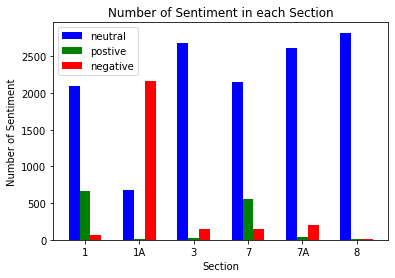

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [
    "1","1A","3","7","7A","8"
]
neutral = [one[0] , oneA[0], three[0], seven[0], sevenA[0],eight[0]]
postive = [one[1] , oneA[1], three[1], seven[1], sevenA[1],eight[1]]
negative = [one[-1] , oneA[-1], three[-1], seven[-1], sevenA[-1],eight[-1]]
X_axis = np.arange(len(X))

ax = plt.subplot(111)  
ax.bar(X_axis-0.2, neutral, width=0.2, color='b', align='center', label = "neutral")
ax.bar(X_axis, postive, width=0.2, color='g', align='center', label = "postive")
ax.bar(X_axis+0.2, negative, width=0.2, color='r', align='center', label = "negative")
plt.xticks(X_axis, X)
plt.xlabel("Section")
plt.ylabel("Number of Sentiment")
plt.title("Number of Sentiment in each Section")
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


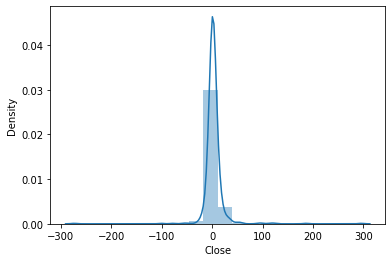

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.distplot(df_train_temp["Close"], kde=True, bins=20, hist=True)
plt.show()

In [ ]:
def mapToBinary(row):
  if row["Close"] > 0:
    return 1
  else:
    return 0

df_train_temp["Close"] = df_train_temp.apply(mapToBinary,axis = 1)
df_train_temp

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,Ticker,Close
0,0,1,0,0,0,-1,-1,-1,0,0,...,-1,-1,0,0,0,0,0,0,MMM_2018,0
1,0,0,0,0,-1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,AOS_2018,0
2,0,0,0,0,-1,-1,0,-1,0,0,...,0,0,-1,0,0,0,0,0,ABBV_2018,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ABMD_2018,0
4,1,1,0,0,-1,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,ADP_2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1,1,1,0,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,DGX_2016,1
218,1,1,0,0,-1,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,SNPS_2016,1
219,0,0,0,0,-1,-1,-1,-1,0,-1,...,0,0,0,0,0,0,0,0,RTX_2016,1
220,1,0,0,0,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,INTC_2016,1


In [ ]:
df_train_temp = df_train_temp.sample(frac=1)
X = df_train_temp.drop(["Ticker","Close"],axis = 1)
y = df_train_temp["Close"]

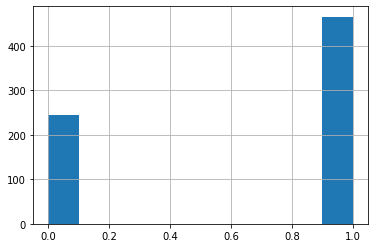

In [ ]:
y.hist()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0,max_depth =10,n_estimators= 30,class_weight = {0:1.5 , 1:1})
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.56338028, 0.64788732, 0.63380282, 0.57746479, 0.6056338 ,
       0.64788732, 0.70422535, 0.63380282, 0.63380282, 0.6056338 ])

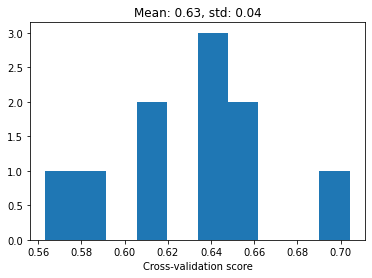

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores)
xmin, xmax = plt.xlim()

mu = scores.mean()
std = scores.std()

title = "Mean: {:.2f}, std: {:.2f}".format(mu, std)
plt.title(title)
plt.xlabel("Cross-validation score")

plt.show()

In [ ]:
scores.mean()

0.6253521126760563

In [ ]:
scores.std()

0.03789753252696819

In [ ]:
clf.fit(X,y)
clf.score(X,y)

0.8084507042253521

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, clf.predict(X))
cm

array([[117, 128],
       [ 11, 454]])

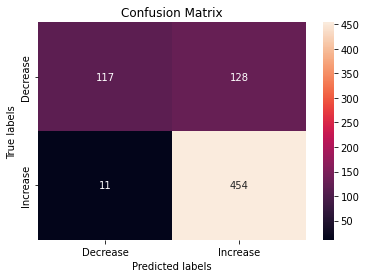

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Decrease', 'Increase']); ax.yaxis.set_ticklabels(['Decrease', 'Increase']);

In [ ]:
y.value_counts()

1    465
0    245
Name: Close, dtype: int64

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df = fi_df.sort_values(by=['feature_importance'], ascending=False)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(data = fi_df , y='feature_importance', x='feature_names')
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE NAMES')
  plt.ylabel("FEATURE IMPORTANCE")

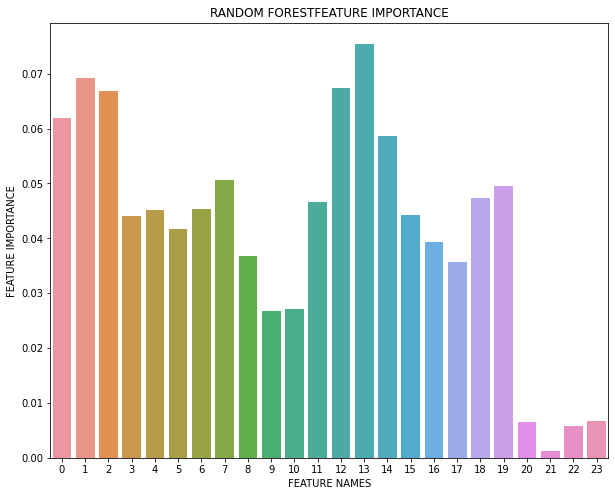

In [ ]:
plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST')